# Меры центральной тенденции

In [1]:
import pandas as pd

bikes = pd.read_pickle('../data/BikesDataVars.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [2]:
bikes['Humidity'].sum() / len(bikes['Humidity'])

58.226255707762554

In [3]:
bikes['Humidity'].mean()

58.226255707762554

In [4]:
hum_sorted = bikes['Humidity'].sort_values().reset_index(drop=True)
print(len(hum_sorted))
ind_1, ind_2 = int(len(hum_sorted)/2), int((len(hum_sorted) + 2)/2)
print((hum_sorted[ind_1] + hum_sorted[ind_2]) / 2)
print(hum_sorted[ind_1], hum_sorted[ind_2])

8760
57.0
57 57


In [5]:
bikes['Humidity'].value_counts().head(2)

53    173
97    173
Name: Humidity, dtype: int64

<AxesSubplot:>

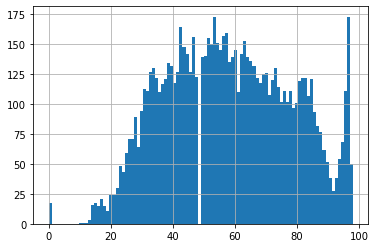

In [6]:
bikes['Humidity'].hist(bins=100)

In [7]:
bikes.describe()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Rental Count,Normal Humidity,Good Weather
count,8760.000000,8581.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.00000,8760.000000
mean,11.500000,12.878557,58.226256,1.724909,0.148687,0.075068,0.049315,696.582078,0.34532,0.092694
std,6.922582,11.955551,20.362413,1.036300,1.128193,0.436746,0.216537,749.812613,0.47550,0.290020
min,0.000000,-17.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,5.750000,3.400000,42.000000,0.900000,0.000000,0.000000,0.000000,157.000000,0.00000,0.000000
50%,11.500000,13.700000,57.000000,1.500000,0.000000,0.000000,0.000000,425.500000,0.00000,0.000000
75%,17.250000,22.500000,74.000000,2.300000,0.000000,0.000000,0.000000,1009.000000,1.00000,0.000000
max,23.000000,39.400000,98.000000,7.400000,35.000000,8.800000,1.000000,6012.000000,1.00000,1.000000


In [8]:
bikes['Humidity'].describe()

count    8760.000000
mean       58.226256
std        20.362413
min         0.000000
25%        42.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humidity, dtype: float64

In [9]:
print(bikes['Humidity'].mean())
print(bikes['Humidity'].median())
print(bikes['Humidity'].mode())

58.226255707762554
57.0
0    53
1    97
dtype: int64


In [10]:
bikes.groupby('Hour')['Rental Count'].mean()

Hour
0      558.178082
1      415.720548
2      319.767123
3      201.010959
4      122.838356
5      135.863014
6      283.654795
7      612.646575
8      979.838356
9      642.136986
10     519.123288
11     585.336986
12     710.534247
13     700.706849
14     747.147945
15     796.084932
16     938.032877
17    1128.873973
18    1518.983562
19    1168.328767
20    1069.698630
21     997.942466
22     893.621918
23     671.898630
Name: Rental Count, dtype: float64

In [11]:
bikes.groupby(['Hour','Good Weather'])['Rental Count'].mean()

Hour  Good Weather
0     0                514.797619
      1               1060.793103
1     0                399.179941
      1                631.384615
2     0                304.476608
      1                547.130435
3     0                193.178161
      1                361.352941
4     0                119.467236
      1                207.357143
5     0                131.218487
      1                343.125000
6     0                279.243017
      1                509.285714
7     0                604.888571
      1                793.666667
8     0                957.336336
      1               1214.000000
9     0                598.072327
      1                940.276596
10    0                478.721154
      1                756.962264
11    0                514.022801
      1                962.810345
12    0                664.558065
      1                969.672727
13    0                674.304075
      1                883.804348
14    0                736.63

<AxesSubplot:xlabel='Hour'>

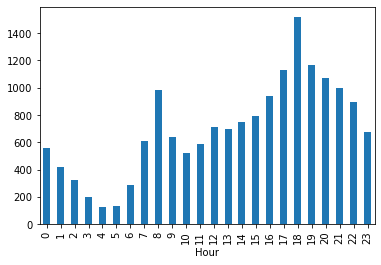

In [12]:
bikes.groupby('Hour')['Rental Count'].mean().plot(kind='bar')

In [13]:
bikes.groupby('Hour')['Rental Count'].median()

Hour
0      433.0
1      329.0
2      239.0
3      165.0
4       94.0
5      107.0
6      193.0
7      410.0
8      762.0
9      519.0
10     414.0
11     485.0
12     572.0
13     586.0
14     567.0
15     678.0
16     804.0
17     899.0
18    1154.0
19     845.0
20     721.0
21     688.0
22     649.0
23     516.0
Name: Rental Count, dtype: float64

In [14]:
bikes.groupby('Seasons')['Temperature Category'].agg(pd.Series.mode)

Seasons
Autumn      Chilly
Spring      Chilly
Summer         Hot
Winter    Freezing
Name: Temperature Category, dtype: object

In [15]:
bikes.groupby('Seasons')['Temperature Category'].agg(lambda x: x.value_counts().index[0])

Seasons
Autumn      Chilly
Spring      Chilly
Summer         Hot
Winter    Freezing
Name: Temperature Category, dtype: object

In [16]:
bikes.groupby('Seasons')['Temperature'].agg('mean')

Seasons
Autumn    14.138821
Spring    13.038533
Summer    26.574827
Winter    -2.567783
Name: Temperature, dtype: float64

In [17]:
bikes.groupby('Seasons')['Temperature'].mean()

Seasons
Autumn    14.138821
Spring    13.038533
Summer    26.574827
Winter    -2.567783
Name: Temperature, dtype: float64

In [18]:
bikes.groupby('Seasons')['Temperature'].agg(func=['mean', 'median'])

,mean,median
Seasons,,
Autumn,14.138821,13.8
Spring,13.038533,13.3
Summer,26.574827,26.6
Winter,-2.567783,-2.2


In [19]:
bikes.columns

Index(['Date', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'Rental Count',
       'Normal Humidity', 'Temperature Category', 'Good Weather'],
      dtype='object')

In [20]:
bikes.pivot_table(index='Hour', 
                  values=['Temperature', 'Rental Count'],
                  aggfunc=['mean', 'median'])

mean                   median            
     Rental Count Temperature Rental Count Temperature
Hour                                                  
0      558.178082   11.253652          433       11.80
1      415.720548   10.972145          329       11.50
2      319.767123   10.542535          239       10.90
3      201.010959   10.355462          165       10.70
4      122.838356   10.069859           94       10.40
5      135.863014    9.849580          107       10.00
6      283.654795    9.763944          193       10.00
7      612.646575    9.454062          410        9.60
8      979.838356    9.988515          762       10.40
9      642.136986   11.459669          519       12.10
10     519.123288   12.766947          414       14.00
11     585.336986   14.285434          485       16.40
12     710.534247   15.417175          572       17.40
13     700.706849   16.184765          586       18.30
14     747.147945   16.862360          567       19.10
15     796.084932   17.084358          678       19.20
16     938.032877   16.821652          804       18.80
17    1128.873973   16.325281          899       18.40
18    1518.983562   15.255956         1154       16.80
19    1168.328767   14.254062          845       15.20
20    1069.698630   13.394460          721       14.10
21     997.942466   12.680165          688       13.40
22     893.621918   12.281461          649       12.95
23     671.898630   11.717416          516       12.25